# Calculation of adsorption for pure fluids by Equation of State

### Thermodynamic equilibrium condition for confined fluids

For a closed system, the first and second laws of Thermodynamics establishes that:

$dU-TdS+PdV \leq 0$                                       

in which U is the internal energy, S is entropy, P is pressure of the system and V is volume of the sistem. However, for confined fluids it is more convenient to work with specified temperature, confining volume and chemical potential. For this specifications, the system does not have a constant mass. Thus, to consider the mass variation of this system, the previous inequality must be written as follows:

$dU_a-T_adS_a+P_adV_a-\mu_adn_a\leq0$

in which $n_a$ is the confined fluid mole number and the index *a* identifies the adsorbed phase. So, rearranging the inequality for $V_a$ constant:

$d(U_a-T_aS_a-\mu_an_a)\leq0$

From the definition of Gibbs energy:

$G=\mu n=U+PV-TS$

Substituting the definition of the Gibbs energy in the inequality:

$d(-P_aV_a)\leq0 $

As the confining volume is constant, the thermodynamic equilibrium condition imposes that:

$dP_a\geq0$

So, for specified temperature, confining volume and the chemical potential, the termodynamic equilibrium condition for the confined fluid is the maximization of its pressure.


### The adsorption problem

The   adsorption   phenomenon   can   be   understood   as   the   accumulation   of substances in an interface. In this work, we are interested in systems in which a fluid   accumulates   in   a   porous   solid.   The   adsorption   problem   is   then characterized by the phase equilibrium between the bulk phase and the adsorbed phase in the solid, and it is possible to write the following equilibrium equation, where *v* is the volumetric phase index and *a* is the adsorbed phase index.

$\mu_i^v=\mu_i^a$

In general, what is desired to obtain from this equation is the density of the adsorbed phase with which it is possible to calculate the total amount of fluid adsorbed in the solid. In this work, the steps that lead to obtaining the density of the   adsorbed   phase will   be   developed   when   a   equation of state   is   used   to
describe both phases in equilibrium.

### Equation of state for confined fluids

In the adsorption  systems,   the adsorbed phase  is   under different conditions from the bulk phase. This is because, within the pores, the interactions between the fluid molecules and the walls of the solid are relevant, changing the thermodynamic   and   structural   properties   of   the   fluid.   In   order   to   study   the properties of fluids under these conditions, Travalloni *et al.* (2010) extended to confined fluid modeling some cubic equations of state, widely used in engineering, using the Generalized van der Waals Theory. 
The models obtained by the authors are able, through empirical expressions, to model the effects of confinement on the properties of the fluids being dependent on variables of the fluid/solid system. In   this   work,   the   model   obtained   by   the   authors   from   the   Peng-Robinson equation   of   state   will   be   used.   It   is   worth mention   that   all   the   equations developed in the referred work retake the original equation on which they were
based, in their volumar limit. In this way,  the same equation can be used to obtain the properties of the volumar and adsorbed phases.

### Calculation of adsorption for pure fluids by Equation of State

One of the necessary conditions for the phases of the adsorption system to be in   thermodynamic   equilibrium   is   determined   by   the   equality   of   chemical potentials that reappears below with its explicit independent variables.

$\mu_v (T,P_v;a,b)=\mu_a(T,\rho_a,r_p;a,b,\epsilon_p,\delta_p)$

In  this   equation, $T$ is   the  system   temperature, $P_v$ is   the   bulk   phase pressure, $a$ e $b$ are the parameters of the Peng-Robinson equation of state, $\rho_a$ is   the   density   of   the   adsorbed   phase, $r_p$ is   the   solid   pore   radius considering its cylindrical geometries, $\epsilon _p$ e $\delta_p$ are the interaction parameters between the fluid molecules and the walls of the solid considering square well potential.
To perform the adsorption calculations, it is necessary to specify $T$, $P_v$, $r_p$, the total volume of pores in the adsorbent ($V_p$) and the parameters $a$, $b$ , $\epsilon _p$ e $\delta_p$. The chemical potential of the system is then defined according to that referring to the volumar phase. 
The model used in this work can provide multiple real roots for a given set of specifications. Only   those   that   satisfy   the   condition   of   mechanical   stability, represented   below,   have   physical   meaning. Moreover,   as   demonstrated   by Travalloni *et al*. (2010), damong the solutions found, the one that results in the
highest pressure value of the adsorbed phase is the most stable.

$\frac{dP_a}{d\rho_a}>0$

In addition, the Topliss method was modified to explicit equations in chemical potential and it will be used here to obtain the real and mechanically stable roots that solve the adsorption problem. Note that the Topliss Method should
only be used in the case of systems with at most three real roots, thus, the conditions studied here were limited to this restriction.
Considering that  the  adsorbed  amount corresponding  to  the total  amount  of adsorbed   fluid   on   the   solid,   the   number   of   adsorbed   moles ($n_a$) can   be calculated according to the equation below:

$n_a=V_p\rho_a$

# Tools

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# Fluid/solid system data

In [2]:
#constants
R = 8.314 #Constant of ideal gases
Nav = 6.022*(10**23) #Avogadro's number
T = 264.75 #temperature
Pi = 3.14159265359 
#fluid
#Tc = 190.6 #critical temperature methane
#Pc = 45.99*10**5 #critical pressure methane
#w = 0.012 #accent factor methane
Tc = 305.3 #critical temperature ethane
Pc = 48.72*10**5 #critical pressure ethane
w = 0.100 #accent factor ethane
a = 0.45724*R**2*Tc**2/Pc #parameter of EOS Peng-Robinson
b = 0.0778*R*Tc/Pc #parameter of EOS Peng-Robinson
sigma = (1.15798*b/Nav)**(1/3) #characteristic length of molecules
alfa = (1+(0.37464+1.54226*w-0.26992*w**2)*(1-(T/Tc)**0.5))**2
#sólido: MCM41
Rcap = 2.04*10**(-9) #mean pore radius of the solid 
h = 7.9616384734967691*10**10 #sum of all pore heights considering cylindrical pores
#deltap = 0.38144*sigma #parameter of the square well potential for methane
#epspk = 702.24 #parameter of the square well potential normalized by k for methane
deltap = 0.78113*sigma #parameter of the square well potential for ethane
epspk = 797.82 #parameter of the square well potential normalized by k for ethane

# Empirical expressions for confined fluids

In [3]:
#expressions
romax = (1.1579783713281564+4.427705489078004/np.exp(4.013769497416034*Rcap/sigma)-0.653722697044913/np.exp(0.6208605306104413*Rcap/sigma))/(Nav*sigma**3) #molar density in the compaction condition 
Fpr = ((Rcap-sigma/2)**2-(Rcap-sigma/2-deltap)**2)/(Rcap-sigma/2)**2 #fraction of molecules that occupy the pore region under attractive influence of the wall in the random distribution
teta = Rcap/(sigma/2+deltap) #modulator of the effect of the fluid density on the distribution of the molecules inside the pore
ncg = 1-2*sigma/(5*Rcap) #modulator of the confinement effect on the reduction of the coordination number of the fluid 

# Discretization of Pressures

In [4]:
#pressures for methane
#P_i = 50000
#P_f = 3100000
#nP = 100
#step = (P_f-P_i)/nP
#P = np.arange(P_i,P_f+step,step)

#pressures for ethane
P_i = 50000
P_f = 2000000
nP = 100
step = (P_f-P_i)/nP
P = np.arange(P_i,P_f+step,step)

# Functions

* Bulk phase volume function

In [5]:
#calculation of v bulk
def function_vb(T,P):

    c3 = P #coefficient for v^3
    c2 = 3*P*b-R*T #coefficient v^2
    c1 = -2*b*R*T+alfa*a-3*P*(b**2)  #coefficient v^1
    c0 = R*T*(b**2)-alfa*a*b+P*(b**3)  #coefficient v^0

    RES = 1
    TOL = 1e-9
    MAX = 1000
    i = 0
    vb = R*T/P
    vb2 = 0
    vb3 = 0
    while(RES>TOL and i<MAX): 
        vb = vb-(c3*vb**3+c2*vb**2+c1*vb+c0)/(3*c3*vb**2+2*c2*vb+c1)
        RES = c3*vb**3+c2*vb**2+c1*vb+c0
        i = i+1
        if vb < b:
            vb = 0


# calc r2 and r3
    c4 = c3
    c5 = c2+c4*vb
    c6 = c1+c5*vb

    delta = (c5**2)-(4*c4*c6)

    if delta >= 0:
        vb2 = (-c5+np.sqrt(delta))/(2*c4)
        if vb2 < b:
            vb2 = 0
        vb3 = (-c5-np.sqrt(delta))/(2*c4)
        if vb3 < b:
            vb3 = 0
    else:
        vb2 = 0
        vb3 = 0

    vb,vb2,vb3 = np.sort([vb,vb2,vb3])
    
    return [vb,vb2,vb3]  

* Function of calculation of chemical potential of the volumar phase

In [6]:
def function_mib(T,v_bulk):
    vb = v_bulk
    mib = (-(1/4))*R*T*(4*(b/(b-vb)+np.log(-b+vb))+(a*alfa*((4*vb)/(-b**2+2*b*vb+vb**2)+(np.sqrt(2)*(-(np.log(b-np.sqrt(2)*b+vb))+np.log(b+np.sqrt(2)*b+vb)))/b))/(R*T))
    return mib

* Function of calculating the adsorbed phase pressure

In [7]:
def function_pa(T,ro_ads):
    roa = ro_ads
    pa = R*roa*T*(romax*(1/(-roa+romax)+(a*alfa*ncg*roa*romax)/(R*roa**2*T-2*R*roa*romax*T-R*romax**2*T))+((-1+Fpr)*roa*(1-roa/romax)**teta*(np.exp(epspk/T)*(epspk-T)+T)*teta)/(np.exp(epspk/T)*((roa-romax)*T)))
    return pa

* Function of calculation of the chemical potential of the adsorbed phase

In [8]:
def function_mia(T,ro_ads):
    roa = ro_ads
    mia = (-(1/4))*R*T*(4*np.log(1/roa-1/romax)+(1/T)*((1/(roa-romax))*(4*(((roa-romax)*((-a)*alfa*ncg*roa*romax**2+epspk*Fpr*R*(roa**2-2*roa*romax-romax**2)))/(R*(roa**2-2*roa*romax-romax**2))+roa*T-((-1+Fpr)*(1-roa/romax)**teta*(np.exp(epspk/T)*(epspk-T)+T)*(roa-romax+roa*teta))/np.exp(epspk/T)))+(np.sqrt(2)*a*alfa*ncg*romax*np.log((roa+np.sqrt(2)*roa+romax)/(roa-np.sqrt(2)*roa+romax)))/R))
    return mia

* Function of calculating the first derivative of the chemical potential of the adsorbed phase in relation to the adsorbed density

In [9]:
def function_dmiadroa(T,ro_ads):
    roa = ro_ads
    dmiadroa = (-((2*a*alfa*ncg*(roa-romax)**2*romax**3*(roa+romax))/(-roa**2+2*roa*romax+romax**2)**2)+(R*romax**2*T)/roa+((-1+Fpr)*R*(1-roa/romax)**teta*(np.exp(epspk/T)*(epspk-T)+T)*teta*(roa-2*romax+roa*teta))/np.exp(epspk/T))/(roa-romax)**2
    return dmiadroa

* Objective function for calculating adsorbed density

In [10]:
def function_Fobj(T,ro_ads):
    Fobj = function_mia - mi_ads
    return Fobj

# Modified Topliss’s method

The number of real solutions that the equilibrium condition will provide depends on the appearance of the $\mu_a$ *vs.* $\rho_a$ curve. In this work, the aspects of the mentioned curve that provide up to three real solutions will be analyzed. The $\alpha$ aspect will always provide a single solution to the equilibrium condition, regardless of the $\mu$ specification of the problem. However, the $\beta$ aspect, may provide one or three  solutions according to the $\mu$ specification of the problem.
To determine the appearance of the $\mu_a$ *vs.* $\rho_a$ studied is necessary to calculate the point at which the $\mu_a$ derivative to $\rho_a$ is minimal. If this point, called point A is positive, the curve looks $\alpha$ and the problem has only one solution. If point A is negative, the number of solutions is not determined yet.
The next step of the method is the calculation of the B and C points, both occur when the derivative of $\mu_a$ in relation to $\rho_a$ is null, however, B has less $\rho_a$ than C. It is then necessary to compare the $\mu_a$ specification of the problem to the $\mu_a$ calculated at points B and C. If $\mu_a$ is less than the
potential at point B and greater than the potential at point C, the problem has only one solution. If $\mu_a$ is among the potentials calculated for points B and C the   problem   presents   three   solutions   of   which   only   those that   respect   the stability criteria will be analyzed.. 

In [11]:
def function_roa(mi_ads):
    #Determination of point A
    sol = optimize.minimize(lambda ro_ads: function_dmiadroa(T,ro_ads),0.9*romax,method='Nelder-Mead', tol=1e-12)
    PtoA = sol.x[0]
    if PtoA >  0:
        roa_aux = optimize.bisect(lambda ro_ads: function_mia(T,ro_ads) - mi_ads, 0.001*romax, 0.9*romax, xtol=2e-12, rtol=8.8817841970012523e-16, maxiter=100)
     
    else:
        #Determination of points B and C
        roa_B = optimize.newton(lambda ro_ads: function_dmiadroa(T,ro_ads), 0.001*romax,tol=1.48e-10, maxiter=1000)
        roa_C = optimize.newton(lambda ro_ads: function_dmiadroa(T,ro_ads), 0.9*romax,tol=1.48e-10, maxiter=1000)

        PtoB = function_mia(T,roa_B)
        PtoC = function_mia(T,roa_C)
        if PtoB > mi_ads or PtoC < mi_ads:
            ro_aux = optimize.bisect(lambda ro_ads: function_Fobj(T,ro_ads), 0.001*romax, 0.9*romax, xtol=2e-12, rtol=8.8817841970012523e-16, maxiter=100)
        
        else:
            ro_aux_menor = optimize.bisect(lambda ro_ads: function_mia(T,ro_ads) - mi_ads, 0.001*romax, roa_B, xtol=2e-12, rtol=8.8817841970012523e-16, maxiter=100)
            ro_aux_menor = optimize.bisect(lambda ro_ads: function_mia(T,ro_ads) - mi_ads, roa_C, 0.9*romax, xtol=2e-12, rtol=8.8817841970012523e-16, maxiter=100)

            pa1 = function_pa(T,ro_aux_menor)
            pa2 = function_pa(T,ro_aux_maior)
            #Stability criterion
            if pa1 > pa2:
                roa_aux = ro_aux_menor
            else:
                roa_aux = ro_aux_maior         
    return roa_aux

# Calculation of adsorbed amount

In [12]:
#volume calculation for the entire isotherm pressure grid
v_bulk = np.zeros([3])
n_ads = np.zeros([nP+1])
for i in range (0,nP+1):
    v_bulk = function_vb(T,P[i])
    nroots = np.count_nonzero(v_bulk)
    if (nroots == 1):
        mi_bulk = function_mib(T,np.max(v_bulk)) 
    elif (nroots == 3):
        mi_bulk = np.min([function_mib(T,v_bulk[0]),function_mib(T,v_bulk[1]),function_mib(T,v_bulk[2])])
    mi_ads = mi_bulk
    ro_ads_aux = function_roa(mi_ads)
    n_ads[i] = ro_ads_aux*Pi*h*Rcap**2

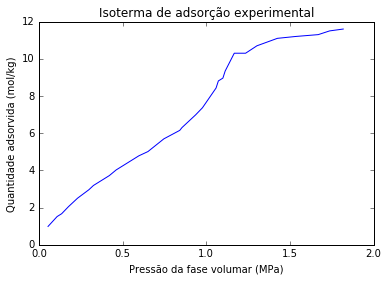

In [13]:
%matplotlib inline
plt.title('Experimental isotherm of adsorption')
plt.ylabel('Quantity adsorbed (mol/kg)') 
plt.xlabel('Bulk phase pressure (MPa)')
#methane
#P_exp = np.sort([53640,67050,93870,120690,201150,375480,670500,965520,1059400,1287400,1609200,1703100,2078500,2212600,2614900,2816100,3097700]) 
#qads = np.sort([1.4159*10**-4,1.9469*10**-4,2.4779*10**-4,3.1858*10**-4,4.9558*10**-4,8.3186*10**-4,1.3274*10**-3,1.7345*10**-3,1.8407*10**-3,2.1062*10**-3,2.4425*10**-3,2.5487*10**-3,2.8673*10**-3,2.9912*10**-3,3.3097*10**-3,3.4513*10**-3,3.6283*10**-3])    
#ethane
P_exp = np.sort([1817800,1736400,1668600,1532900,1424400,1302300,1234500,1166700,1112400,1098800,1071700,1058100,976740,936050,854650,841090,746120,651160,596900,461240,420540,352710,325580,298450,230620,176360,135660,108530,54264]) 
qads = np.sort([0.0115,0.0116,0.0113,0.0112,0.0111,0.0107, 0.0103,0.0103,9.3418*10**-3,8.9620*10**-3,8.8101*10**-3,8.4304*10**-3,7.3671*10**-3,6.9873*10**-3,6.3038*10**-3,6.1519*10**-3,5.6962*10**-3,5.0127*10**-3,4.7848*10**-3,4.0253*10**-3,3.7215*10**-3,3.3418*10**-3,3.1899*10**-3,2.9620*10**-3,2.5063*10**-3,2.0506*10**-3,1.6709*10**-3,1.5190*10**-3,9.8734*10**-4]) 
plt.plot(P_exp/1000000,qads*1000)
plt.show()

# Isotherm

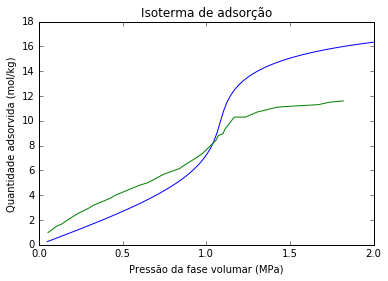

In [14]:
%matplotlib inline
plt.title('Isotherm of adsorption')
plt.ylabel('Quantity adsorbed (mol/kg)') 
plt.xlabel('Bulk phase pressure (MPa)')
plt.plot(P/1000000, n_ads*1000,P_exp/1000000,qads*1000)
plt.show()

#### Referências

* Travalloni, L.; Castier, M.; Tavares, F. W.; Sandler, S. I. Thermodynamic modeling of confined fluids using an extension of the generalized van der Waals theory. *Chemical Engineering Science*, v. 65, p. 3088, 2010.

* Yun, J.H.; Düren, T.; Keil, F. J.; Seaton, N. A. Adsorption of methane, ethane, and their binary mixtures on MCM-41: experimental evaluation of methods for the prediction of adsorption equilibrium. *Langmuir*, v. 18, p. 2693, 2002.